In [1]:
my.data <- read.table ("gene_expression_n438x978.txt", sep="\t", header=T)
dimnames(my.data)[[1]] <- my.data[,1]
my.data <- my.data[, -1]
dim (my.data)
my.data[1:5, 1:5]

[1] 438 978

,PSME1,ATF1,RHEB,FOXO3,RHOA
ACETAZOLAMIDE,-0.015159099,-0.031470528,-0.004733488,0.02591061,0.0056296773
IRBESARTAN,-0.026811981,0.012151979,-0.025550148,-0.02401181,-0.0106717396
IPRATROPIUM BROMIDE,0.001017958,-0.008650622,-0.018128698,-0.02079971,-0.0002722781
EFAVIRENZ,-0.004398264,0.055387992,0.004658520,0.01380732,-0.0340697348
THIAMINE,0.001838965,-0.018079188,-0.011855532,-0.03705033,-0.0133954959


In [2]:
my.data <-t(my.data)

In [3]:
source("https://bioconductor.org/biocLite.R")
biocLite(c("gplots", "cluster"))

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.4 (2018-03-15).
Installing package(s) ‘gplots’, ‘cluster’



The downloaded binary packages are in
	/var/folders/ls/2mnnwyr11cj5bfycs5hfwmtc0000gn/T//RtmpPg3372/downloaded_packages


Old packages: 'DBI', 'MASS', 'RSQLite', 'foreign', 'pbdZMQ', 'pillar',
  'stringi'


## A:use the Euclidean distance to compute pairwise distances

In [4]:
d <- dist (my.data, method="euclidean")

In [5]:
ret.hclust1 <- hclust (d, method="complete")

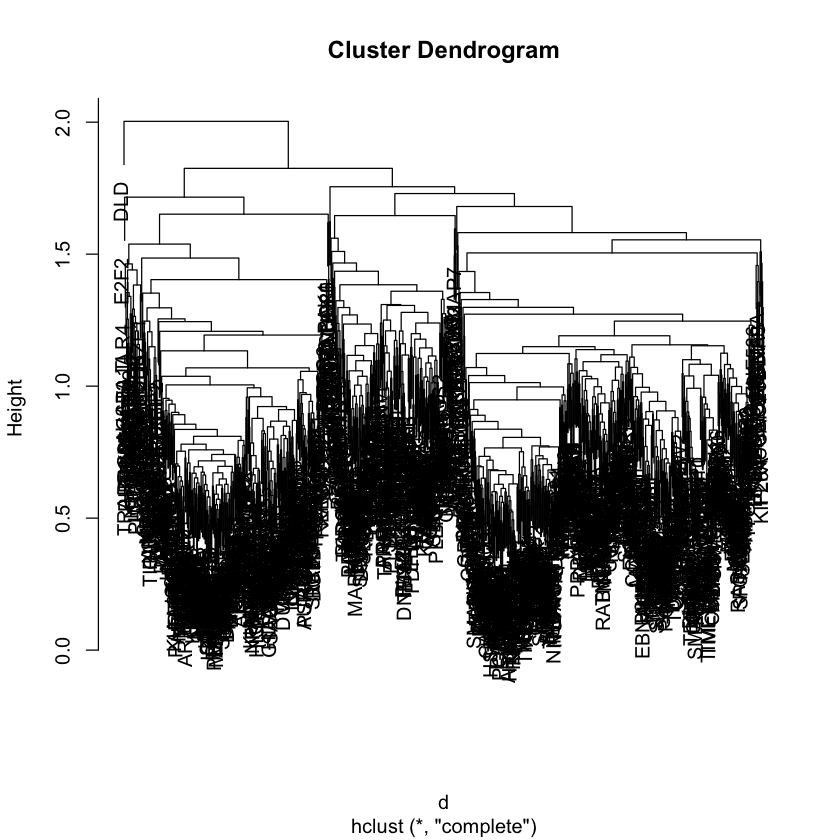

In [6]:
plot (ret.hclust1)

## B: use the correlation coefficient to compute pairwise distances

In [7]:
dd <- as.dist ((1- cor(t(my.data)))/2)

In [8]:
ret.hclust2 <- hclust (dd, method="complete")

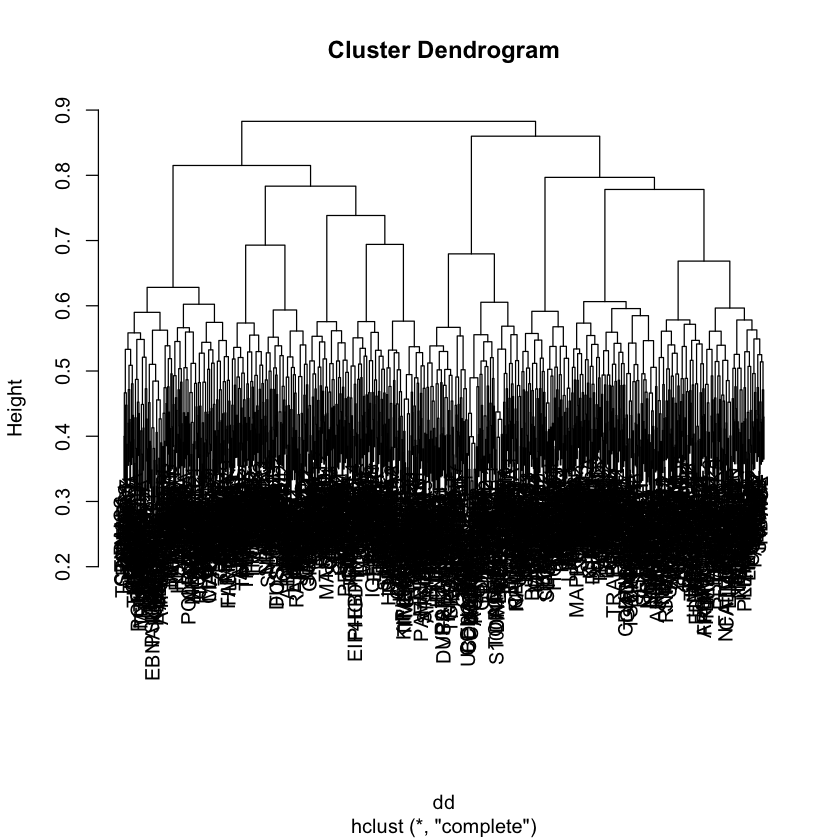

In [9]:
plot (ret.hclust2)

## C. Visualize the resulting clusters from (a) and (b) using heatmaps.

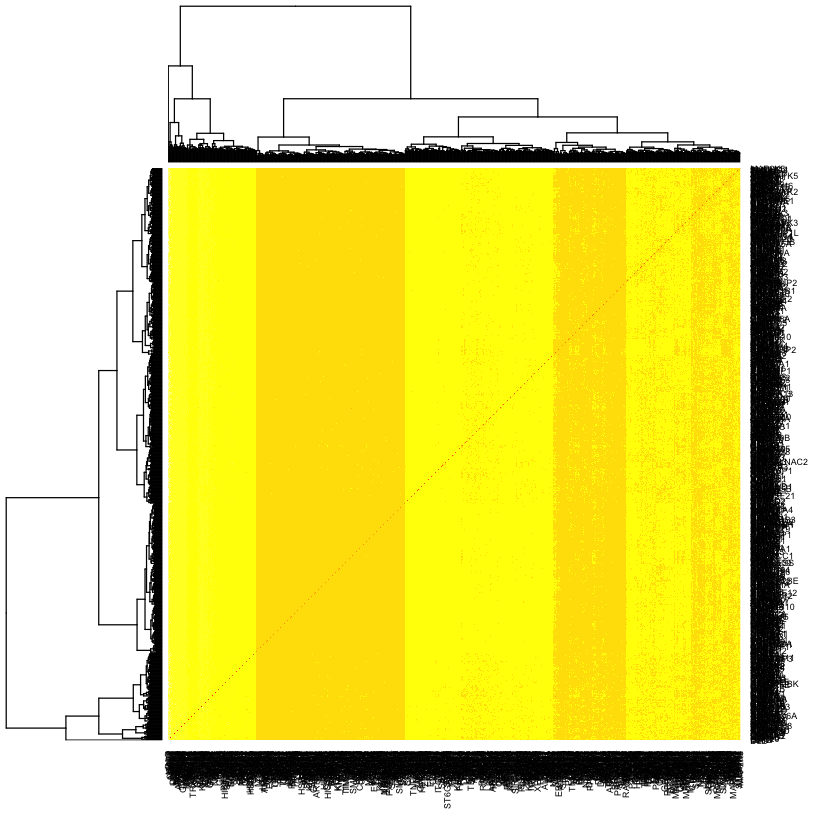

In [10]:
heatmap (as.matrix (d))

In [11]:
newdist <- function (x) {as.dist (1-cor(t(x)))/2}

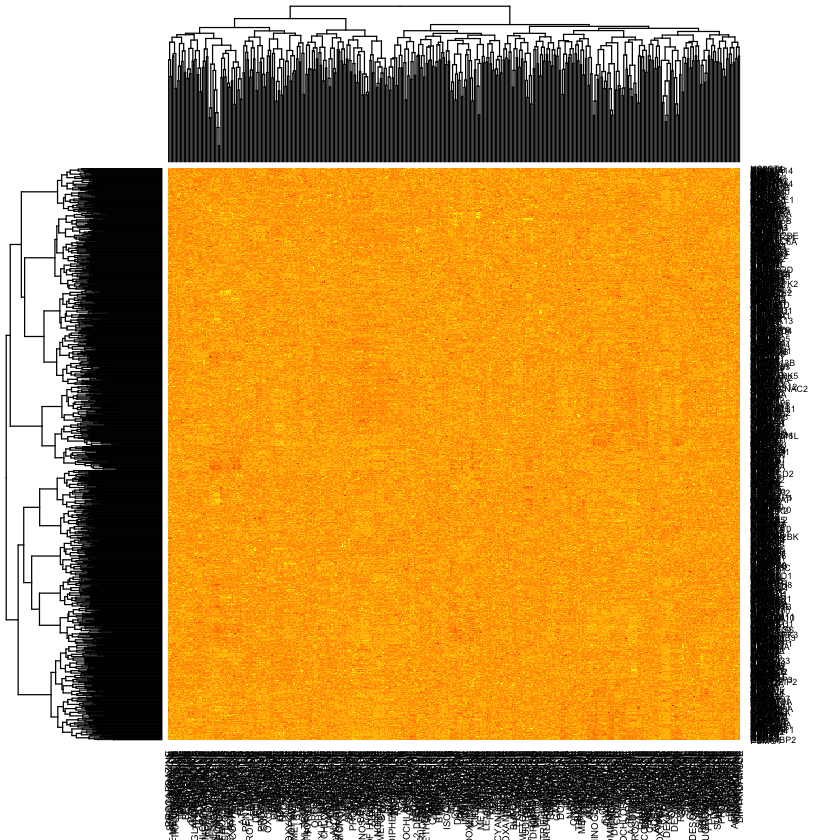

In [12]:
heatmap (as.matrix(my.data), distfun=newdist)

## D. What are the differences between these two pairwise distance measures?

euclidean distance is the square root of the sum of squared differences between corresponding elements of the two vectors

euclidean distance was the sum of squared differences, correlation is basically the average product

Euclidean distance is only appropriate for data measured on the same scale

## E. Compare the clusters obtained using the samealgorithm(hierarchicalcompletelink) but different distance measures.

In [13]:
d2 <- dist (my.data, method="maximum")

In [14]:
ret.hclust_d2 <- hclust (d2, method="complete")

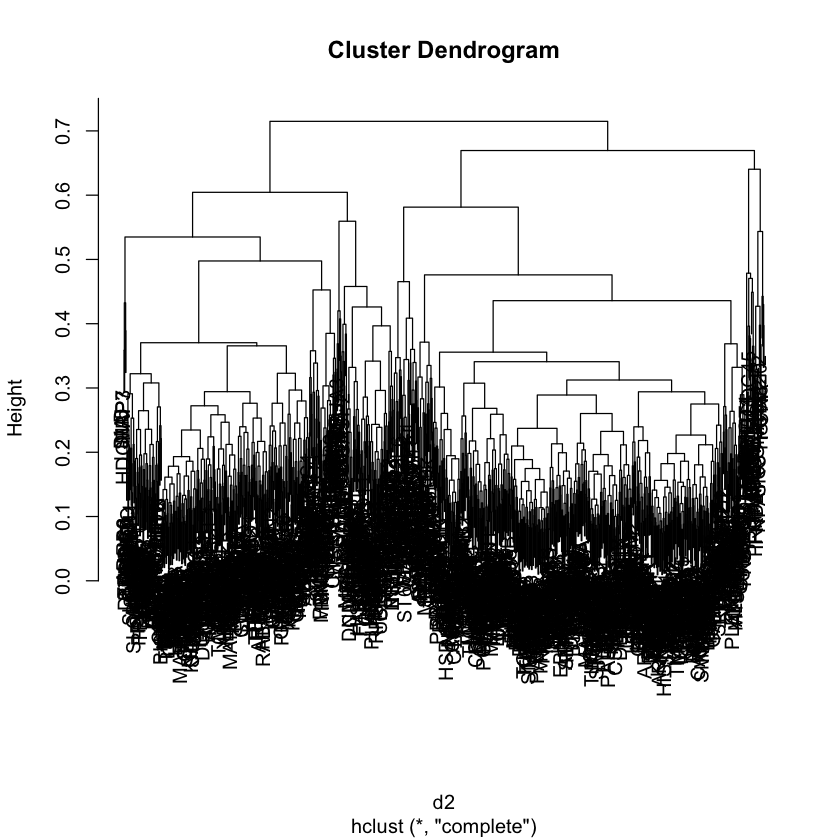

In [15]:
plot(ret.hclust_d2)

In [16]:
d3 <- dist (my.data, method="manhattan")

In [17]:
ret.hclust_d3 <- hclust (d3, method="complete")

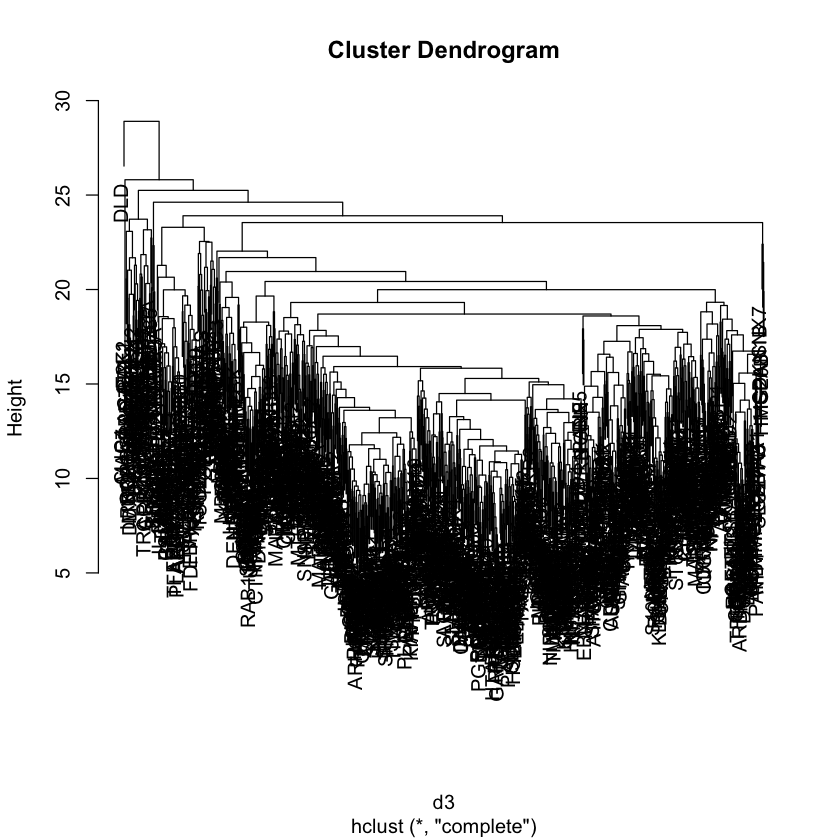

In [18]:
plot(ret.hclust_d3)

# 2

In [19]:
ret.kmeans <- kmeans(my.data,10)

In [20]:
ret.kmeans$size

[1] 129 205   9  55  96  80  59  58 152 135

In [21]:
ret.kmeans$cluster[1:13]

PSME1     ATF1     RHEB    FOXO3     RHOA     IL1B    ASAH1     RALA 
       9        8       10        2        2        1       10        8 
ARHGEF12     SOX2 SERPINE1  HLA.DMA      EGF 
       1        1        2        2        2

In [22]:
library(cluster)
sf <- silhouette(ret.kmeans$cluster, dist(my.data,method="euclidean"))

In [23]:
summary(sf)

Silhouette of 978 units in 10 clusters from silhouette.default(x = ret.kmeans$cluster, dist = dist(my.data,  from     method = "euclidean")) :
 Cluster sizes and average silhouette widths:
         129          205            9           55           96           80 
-0.008834204  0.014522160 -0.154991201  0.004595356 -0.059029761 -0.044334010 
          59           58          152          135 
-0.046794212 -0.033638412 -0.024126722  0.017386789 
Individual silhouette widths:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.19832 -0.03652 -0.01125 -0.01488  0.01149  0.09980 

In [32]:
out.vec <- NULL
for (k in seq (2, 100, by=2)) {
    curr.kmeans <- kmeans (my.data, k)
    curr.sil <- silhouette (curr.kmeans$cluster, dist(my.data, method="euclidean"))
    out.vec <- c(out.vec, mean(curr.sil[,3]))
}

Warning message:
“did not converge in 10 iterations”

In [33]:
out.vec

[1]  0.027999661  0.013540539  0.002566046 -0.001661344 -0.007743269
 [6] -0.014637927 -0.014200400 -0.020731103 -0.014571795 -0.033787288
[11] -0.029553255 -0.012195124 -0.032695935 -0.037993320 -0.030292518
[16] -0.029752809 -0.029512428 -0.043044150 -0.024385716 -0.039141997
[21] -0.035509584 -0.047479465 -0.042059594 -0.038466978 -0.025041889
[26] -0.040801753 -0.031036685 -0.040114149 -0.038484747 -0.039931803
[31] -0.041377058 -0.044437460 -0.033206933 -0.045687892 -0.042014912
[36] -0.028251780 -0.048331105 -0.042699460 -0.043793207 -0.051133469
[41] -0.037901664 -0.046607760 -0.033099742 -0.038377572 -0.050423498
[46] -0.042746621 -0.037916110 -0.052707953 -0.038508260 -0.047715095

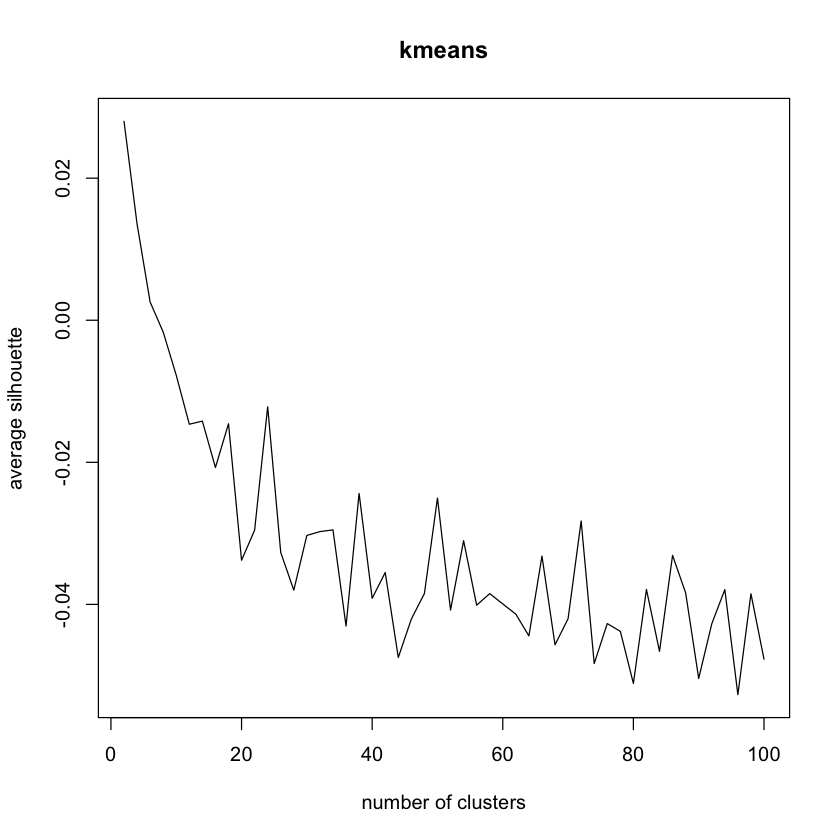

In [34]:
plot (seq(2, 100, by=2), out.vec, type="l", main="kmeans", xlab="number of clusters", ylab="average silhouette")